# Gathering data from Vivino.com about the wine data

The data of vivino is updated daily, and the data I used was scraped by Spyder on 29-05-2021.

##### Gathering data about wine's name, reating, price, country, winery, year, acidity, intensity, sweetness and tannin

##### Put data into dataframe and save into CSV file

# Wine data machine learning

## Introduction

Because I was very interested in wine, I decided to capture alcohol data on Vivino.com to analyze what influences the ratings of wine. Vivino is a Danish company and it is the most downloaded Wine application, used by more than 51 million users worldwide（Vivino.com,2021）. The database contains millions of wines and constitutes the most extensive wine cellar in the world. I scraped information about 1573 bottles of wine from Vivino's webpage, including wine rating, price, country, country code, winery, winery id, year of production, acidity, intensity, sweetness, tannin, grapes and grapes ID.

In [2]:
#Imoprt module needed:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier

First of all, we are going to import the data and see the basic infomation of the dataframe:

In [3]:
df = pd.read_csv("Wine_data.csv")
df.head()

,Unnamed: 0,name,rating,Rating counts,price,Country,Winery,Winery id,Year,Acidity,Intensity,Sweetness,Tannin,Grapes,Grapes id
0,0,Louis Roederer Brut Premier Champagne,4.2,47935,78.07,France,Louis Roederer,1235,N.V.,4.270260,3.770260,NaN,NaN,Chardonnay,5
1,1,Pol Roger Sir Winston Churchill Brut Champagne...,4.6,1451,205.00,France,Pol Roger,1274,2002,4.484065,4.054377,NaN,NaN,Chardonnay,5
2,2,Paraduxx X2 2016,4.5,30,105.00,United States,Paraduxx,536,2016,3.972760,4.730052,1.158411,3.610677,Shiraz/Syrah,1
3,3,Pol Roger Brut Vintage Champagne (Extra Cuvée ...,4.3,2441,85.00,France,Pol Roger,1274,2008,4.527908,4.003366,NaN,NaN,Chardonnay,5
4,4,Paraduxx Proprietary Red 2018,4.3,25,50.00,United States,Paraduxx,536,2018,3.785968,4.732352,1.632194,3.327557,Shiraz/Syrah,1


Cleaning data:

In [4]:
# Delete Unnamed column
df = df.drop(columns=['Unnamed: 0'])

# Making Year variable become numerical data:
df['Year'] = df['Year'].replace({"N.V.":"0"})
df['Year'] = df['Year'].replace({"0":"np.nan"})
df.drop(df.loc[df['Year']== 'np.nan'].index, inplace=True)#drop the invail data
df['Year'] = df['Year'].astype(float)


In [5]:
df.describe()

,rating,Rating counts,price,Winery id,Year,Acidity,Intensity,Sweetness,Tannin,Grapes id
count,1498.000000,1498.000000,1498.000000,1498.000000,1497.000000,1498.000000,1498.000000,1433.000000,1209.000000,1498.000000
mean,4.452203,536.751669,668.959190,26805.954606,2004.070808,3.739777,4.015853,1.976957,3.543459,13.850467
std,0.308678,1249.158255,1574.312051,54639.401105,15.672417,0.583376,0.549232,0.842432,0.553768,37.371275
min,3.600000,25.000000,2.000000,52.000000,1929.000000,1.476459,1.219347,1.029497,1.631362,1.000000
25%,4.200000,63.000000,87.260000,1586.000000,1996.000000,3.346939,3.789163,1.620655,3.244132,2.000000
50%,4.500000,154.000000,236.090000,7759.000000,2010.000000,3.820553,4.098743,1.710912,3.527780,2.000000
75%,4.700000,500.500000,690.000000,13610.250000,2016.000000,4.211937,4.306305,1.911380,4.015686,14.000000
max,5.000000,14021.000000,25451.300000,290161.000000,2020.000000,4.887518,5.000000,4.938483,4.811760,454.000000


In [6]:
df=df.dropna() #drop the empty data in the dataframe

In [7]:
df.head() #Shows the data set after all of steps

,name,rating,Rating counts,price,Country,Winery,Winery id,Year,Acidity,Intensity,Sweetness,Tannin,Grapes,Grapes id
2,Paraduxx X2 2016,4.5,30,105.00,United States,Paraduxx,536,2016.0,3.972760,4.730052,1.158411,3.610677,Shiraz/Syrah,1
4,Paraduxx Proprietary Red 2018,4.3,25,50.00,United States,Paraduxx,536,2018.0,3.785968,4.732352,1.632194,3.327557,Shiraz/Syrah,1
7,Paraduxx Postmark Rector Creek Vineyard Red 2016,4.2,37,82.00,United States,Paraduxx,536,2016.0,3.913842,4.858026,1.444211,3.582684,Shiraz/Syrah,1
8,Paraduxx Proprietary Red 2017,4.1,470,100.00,United States,Paraduxx,536,2017.0,3.785968,4.732352,1.632194,3.327557,Shiraz/Syrah,1
10,Remoriquet Nuits-Saint-Georges 1er Cru 'Les Sa...,4.1,30,74.86,France,Remoriquet,5191,2012.0,4.268214,2.631326,1.222296,2.843929,Pinot Noir,14


In [8]:
df.describe()

,rating,Rating counts,price,Winery id,Year,Acidity,Intensity,Sweetness,Tannin,Grapes id
count,1208.000000,1208.000000,1208.000000,1208.000000,1208.000000,1208.000000,1208.000000,1208.000000,1208.000000,1208.000000
mean,4.432036,475.870033,629.574015,27408.668874,2004.877483,3.676609,4.040063,1.758693,3.543505,11.368377
std,0.305229,999.903571,1535.582881,54566.297081,13.895809,0.555317,0.486913,0.268351,0.553995,26.036700
min,3.700000,25.000000,2.000000,52.000000,1945.000000,1.667919,1.219347,1.057335,1.631362,1.000000
25%,4.200000,65.000000,87.260000,1586.000000,1997.000000,3.337920,3.815435,1.620655,3.244132,2.000000
50%,4.500000,153.000000,211.435000,6814.000000,2011.000000,3.691503,4.129466,1.702834,3.528448,2.000000
75%,4.700000,490.000000,632.452500,13804.000000,2016.000000,4.180574,4.278132,1.859462,4.015686,12.000000
max,4.900000,11558.000000,25451.300000,290161.000000,2020.000000,4.887518,5.000000,3.412650,4.811760,385.000000


## Wine Rating Correlation

#### To begin with, I want to see the correlations among all the numerical variables.

I. I am going to use scatterplot matrix  to see the overview of the Vivino data set with multiple quantitative variables.

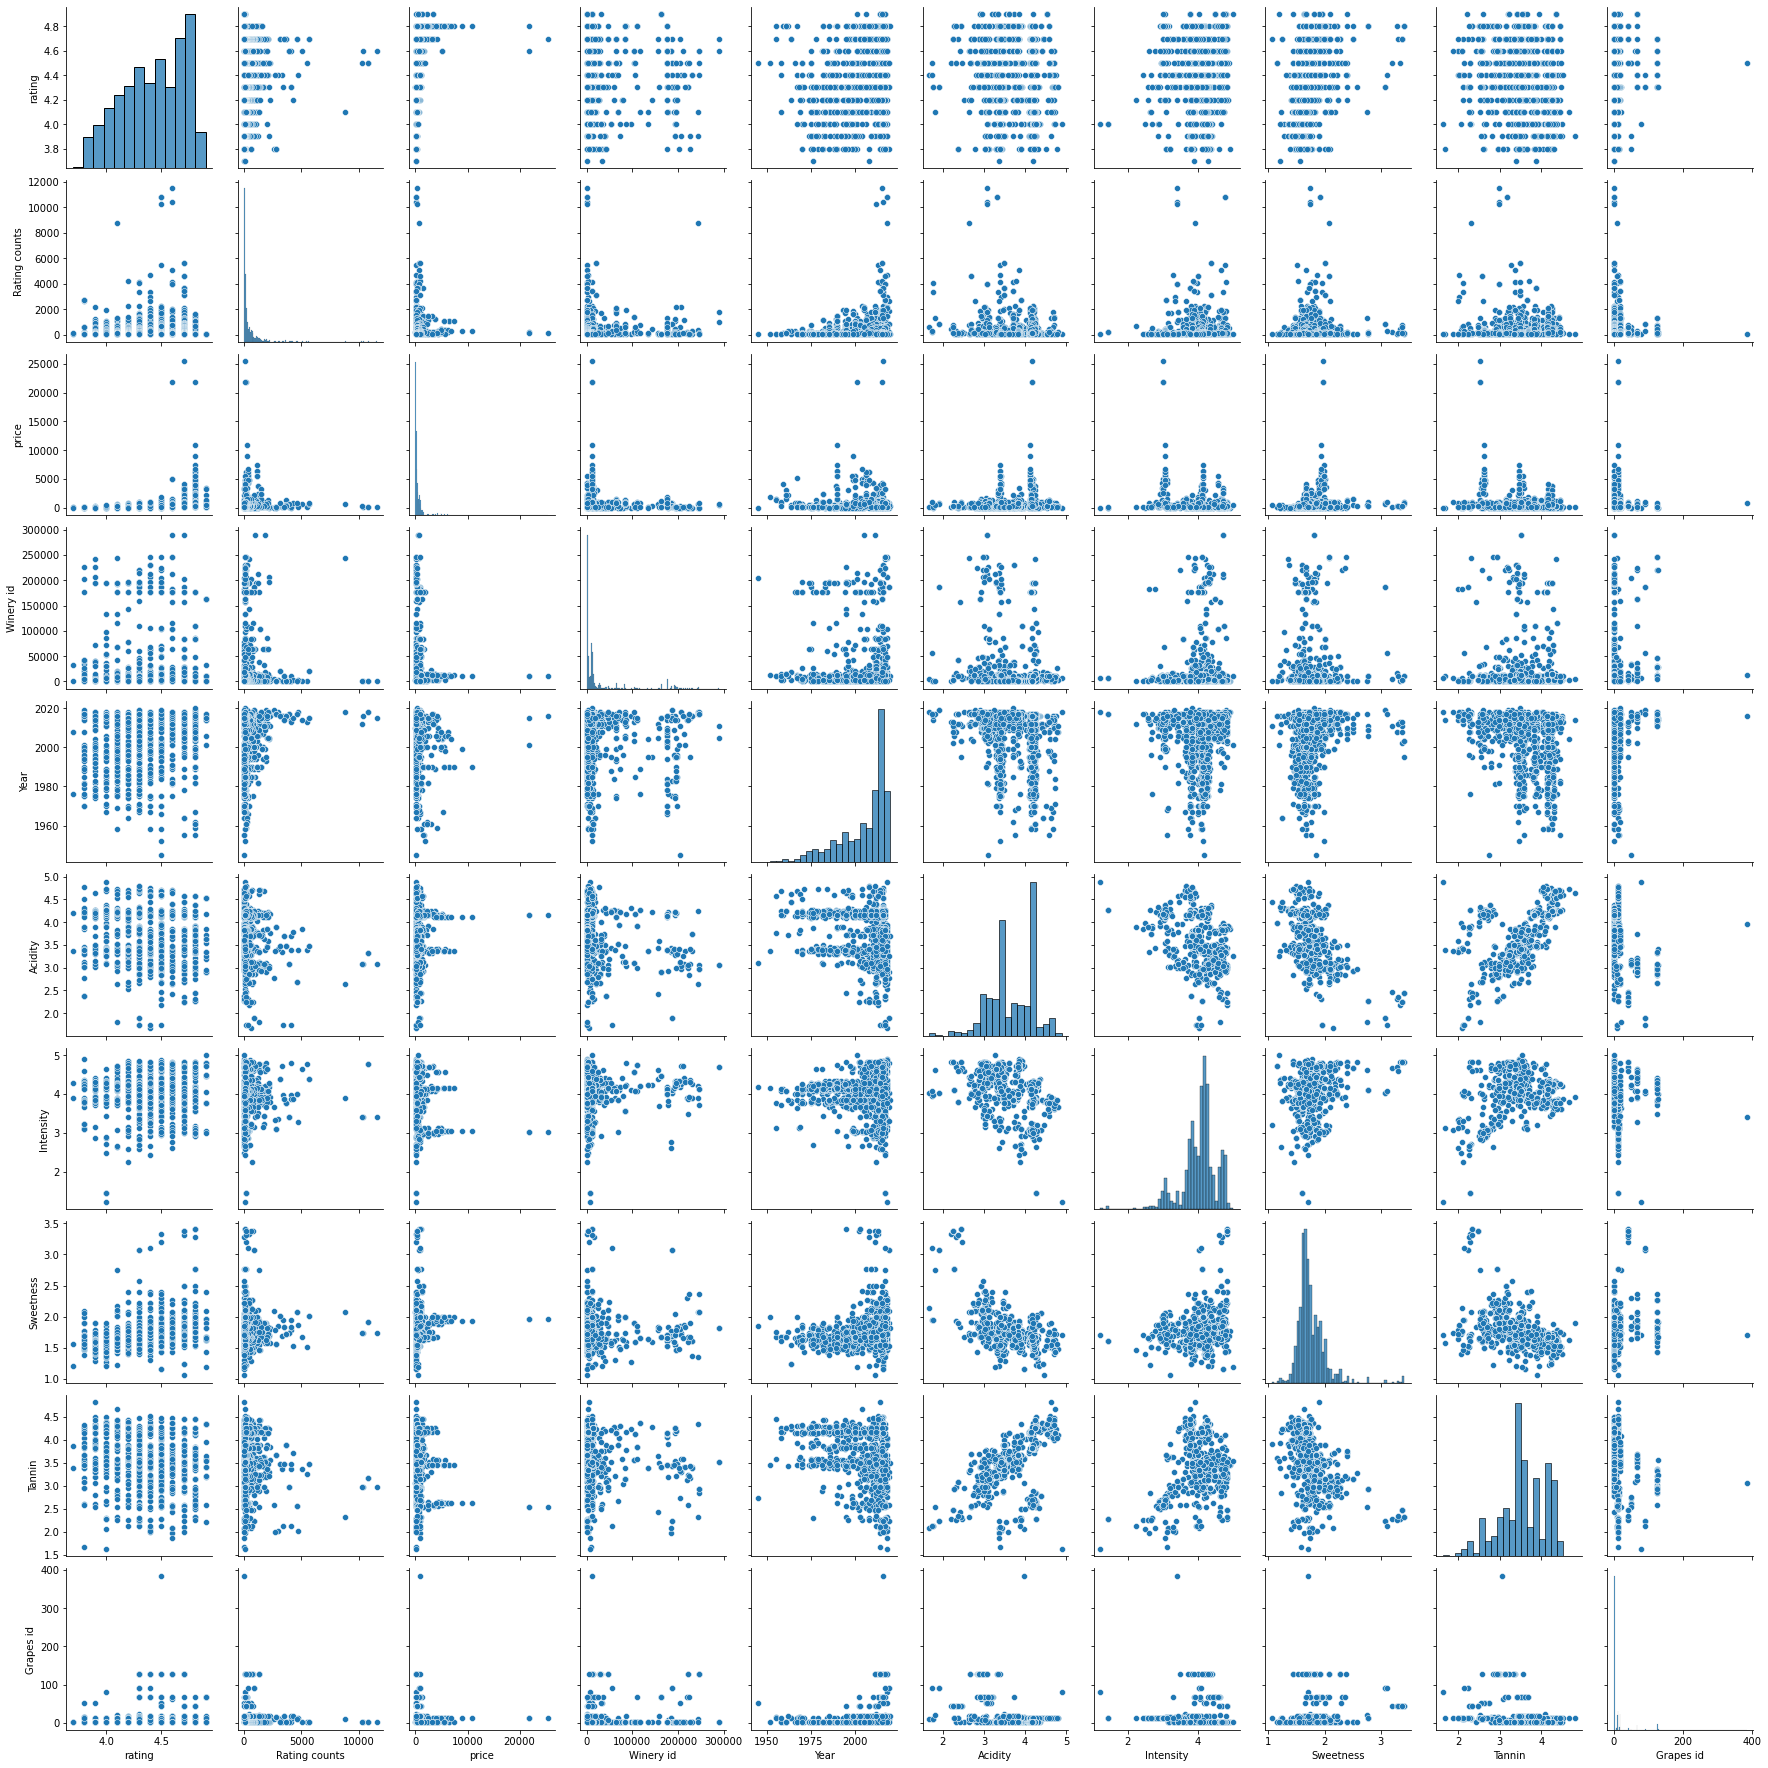

In [29]:
sns.pairplot(df)
plt.show()

There are a few things to note here:                                                           

1.There is postitive correlation between acidity and tannin.

2.Intensity has positive correlation with tannin and sweetness, and intensity has negative correlation with acidity, but it is not very clear.

3.Tannin rate has negative correlation with sweetness.

#### First of all,  I am going to zoom in  the relation between price and rating.

I am going to view the target variable.

In [10]:
#count of each target variable
from collections import Counter
Counter(df['rating'])

Counter({4.5: 134,
         4.3: 125,
         4.2: 100,
         4.1: 89,
         4.0: 74,
         3.9: 53,
         4.7: 159,
         4.8: 188,
         4.6: 99,
         4.4: 105,
         4.9: 44,
         3.8: 38,
         3.7: 2})

<AxesSubplot:xlabel='rating', ylabel='count'>

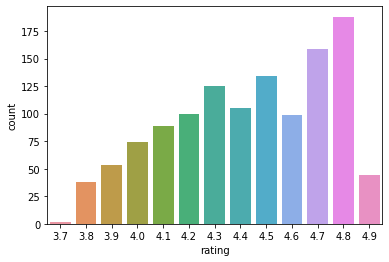

In [11]:
#count of the target variable by plot.
sns.countplot(x='rating', data=df)

Calculate the correlation, Pearson's r. 

In [30]:
from scipy.stats.stats import pearsonr 
print(pearsonr(df['rating'],df['price']))

(0.33156250567490536, 2.1848951088803286e-32)


The output gives us two numbers: r which is 0.33, and p which appears to be 1.859375558403123e-32, but which is actually just really small. We can conclude the following:

Wine rating and wine price are week correlated (r = 0.33)

The correlation is highly significant (p < 0.001)

#### Second, We can also calculate all the correlations and make a correlation matrix by using the Pandas corr() method for dataframes.

In [78]:
corr = df[['rating','Rating counts' ,'price','Year','Acidity','Intensity','Sweetness','Tannin']].corr() #I'm leaving out the corrected variables (divided by 1 million)
corr

,rating,Rating counts,price,Year,Acidity,Intensity,Sweetness,Tannin
rating,1.000000,0.073874,0.331563,0.250253,-0.116166,0.007778,0.349770,-0.165885
Rating counts,0.073874,1.000000,-0.016492,0.169970,-0.112611,-0.004171,0.040131,-0.081440
price,0.331563,-0.016492,1.000000,-0.023173,0.100679,-0.228642,0.159280,-0.190412
Year,0.250253,0.169970,-0.023173,1.000000,-0.252548,-0.009663,0.201887,-0.311688
Acidity,-0.116166,-0.112611,0.100679,-0.252548,1.000000,-0.368275,-0.563534,0.597347
Intensity,0.007778,-0.004171,-0.228642,-0.009663,-0.368275,1.000000,0.154311,0.288431
Sweetness,0.349770,0.040131,0.159280,0.201887,-0.563534,0.154311,1.000000,-0.480763
Tannin,-0.165885,-0.081440,-0.190412,-0.311688,0.597347,0.288431,-0.480763,1.000000


We can also visualize this correlation in a heatmap using the Seaborn heatmap function

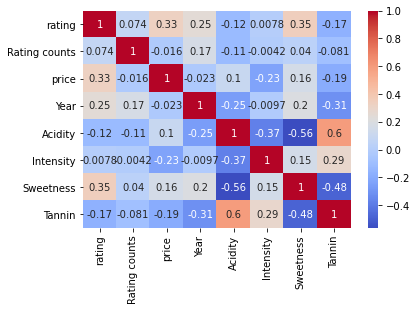

In [79]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,annot=True,linewidths=0,cmap='coolwarm') #the last two arguments set the column names
plt.show()

According to the heat map, we can see the following information:

1.Rating has medium positive correlation with price and sweetness, which are 0.33 and 0.35.And it has small negative correlation with tainnin, which is -0.11.

2.Price has weak postive correlation with acidity, which is 0.11, as well as sweetness, which is 0.16. But,it has small negative correlation with Intensity and Tannin,which are -0.23, -0.19 respectively.

4.Acidity has medium negative correlation with intensity, and large negative correlation with sweetness,they are -0.37 and -0.56. Besides, it has large positive correlation with tannin, which is 0.60.

5.Intensity has small strength of positive association with sweetness, which is 0.15, and it has medium strength of positive association with tannin, which is 0.29.

6.Sweetness has large strength of negative association with tainnin which is -0.48.

#### Let's see if the wine rating and non-numerical data:

Since we cannot use scatterplot and correlation cannot use text variables, but I am still curious about what kind of relationships about countries,year, grape with ratings.

###### 1. Country variable: groupby the country variable to see the average price and rating:

In [15]:
#count of each target variable
Counter(df['Country'])

Counter({'United States': 113,
         'France': 652,
         'Portugal': 62,
         'Italia': 164,
         'Australia': 53,
         'Argentina': 20,
         'España': 101,
         'New Zealand': 1,
         'Chile': 32,
         'South Africa': 7,
         'México': 2,
         'Deutschland': 3})

In [16]:
 #groupby country and calculate the mean.
df1 = df.groupby(by=["Country"], dropna= True).mean()
df1

,rating,Rating counts,price,Winery id,Acidity,Intensity,Sweetness,Tannin,Grapes id
Country,,,,,,,,,
Argentina,4.530000,2254.950000,498.871000,41423.050000,2.974124,4.136267,2.059692,2.923280,6.550000
Australia,4.475472,278.528302,448.128113,3275.037736,3.156729,4.536637,2.027415,3.145203,1.660377
Chile,4.337500,605.625000,192.509062,82172.062500,3.008824,4.413831,1.852297,3.208799,9.906250
Deutschland,4.000000,186.000000,76.500000,6464.000000,4.271635,1.442850,1.603405,2.290791,14.000000
España,4.627723,592.584158,465.680990,12761.009901,3.549592,3.989272,1.840044,3.509220,20.465347
France,4.338957,324.317485,781.860578,29118.263804,3.887266,3.972755,1.668813,3.676695,3.542945
Italia,4.481098,694.323171,405.485244,18352.085366,3.707552,3.730542,1.871893,3.631895,12.347561
México,4.450000,91.500000,949.000000,16035.000000,3.415629,3.900073,1.923826,3.551727,12.000000
New Zealand,4.400000,76.000000,84.880000,1675.000000,3.856130,2.435321,1.704097,2.266001,14.000000


In [17]:
df1 = df1.reset_index()#reset the index for the dataframe, in order to make the following steps easier.

<AxesSubplot:xlabel='rating', ylabel='Country'>

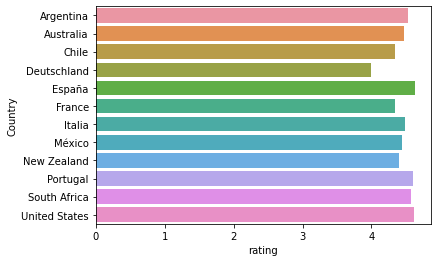

In [18]:
sns.barplot(x='rating',y='Country', data=df1) #Using barplot.

This barplot illustrates the average wine score of each country in the wine data set I scraped. We can see that Spain has the highest average score for wine and Germany has the lowest average score.

<AxesSubplot:xlabel='price', ylabel='Country'>

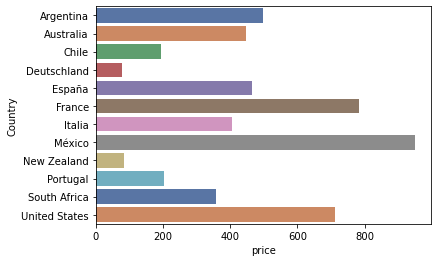

In [19]:
sns.barplot(x="price", y="Country", data=df1,palette="deep")

This barplot describles the average price of wine in each country in the wine data set I have scraped. We can see that Mexico has the highest average price of wine, and New Zealand and Germany have the lowest average price.

###### 2. YEAR variable: groupby the year variable to see the average price and rating:

In [20]:
df2= df.groupby(by=["Year"], dropna=True).mean()#groupby the data by year.

In [41]:
df2=df2.sort_values(by=['Year'], ascending = False) #sort the values by year.

In [42]:
df2 = df2.reset_index() #reset the index and prepare for following steps.

In [43]:
df2= df2.drop(0)#There is an year value is empty, I am going to remove it.

Year and Rating:

<ipython-input-24-adcab4df978a>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(


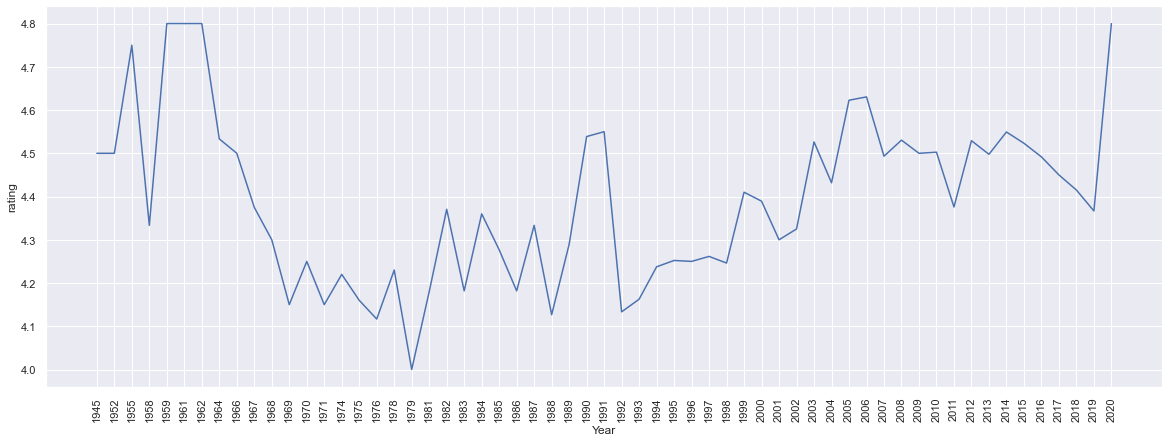

In [24]:
sns.set_theme(style="darkgrid")
g=sns.lineplot(x="Year", y="rating",
             data=df2)
g.set_xticklabels(
    labels=df2['Year'], rotation=90)
g.figure.set_size_inches( 20, 7)
plt.show()

This line chart illustrates the average score for each vintage.

Year and Price

<ipython-input-25-97ac2165426c>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  g.set_xticklabels(


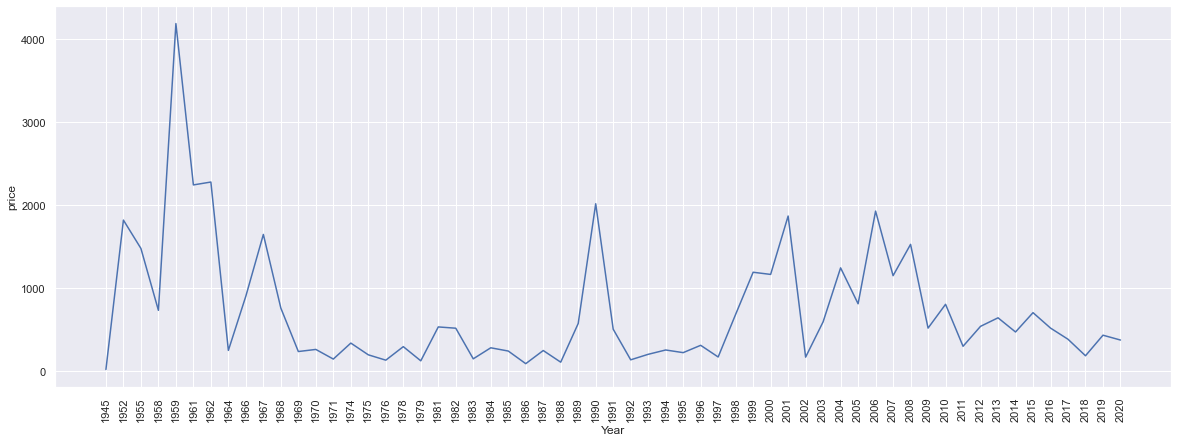

In [25]:
sns.set_theme(style="darkgrid")
g=sns.lineplot(x="Year", y="price",
             data=df2)
g.set_xticklabels(
    labels=df2['Year'], rotation=90)
g.figure.set_size_inches( 20, 7)
plt.show()

This line chart illustrates the average price of wine in various years. Basically, the more vintage the wine, the higher the price, especially before 1969.

###### 3.Grapes variable: groupby the grapes variable to see the average price and rating:

In [48]:
df4 = df.groupby(by=["Grapes"], dropna= True).mean()

In [49]:
df4 = df4.reset_index()#reset the index of df4.

In [50]:
df4.head()

,Grapes,rating,Rating counts,price,Winery id,Acidity,Intensity,Sweetness,Tannin,Grapes id
0,Aragonez,4.569697,487.636364,162.030909,57883.484848,2.937895,4.202319,1.952121,3.045360,127.0
1,Baga,4.300000,149.000000,34.255000,124566.500000,3.228312,3.941204,1.791767,3.391419,129.0
2,Cabernet Sauvignon,4.376955,545.960894,498.913380,31881.927374,3.750645,4.145524,1.687554,3.741640,2.0
3,Carménère,4.240000,237.400000,31.128000,57171.400000,3.106524,4.194894,1.917060,2.654849,51.0
4,Corvina,4.700000,253.454545,414.485455,7016.545455,2.329930,4.776354,3.349878,2.366543,43.0


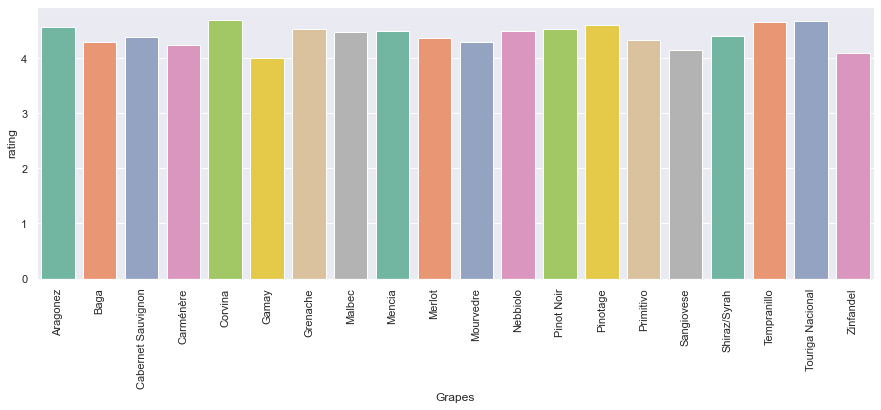

In [55]:
f= sns.barplot(x='Grapes',y='rating', data=df4,palette= 'Set2') 
f.set_xticklabels(
    labels=df4['Grapes'], rotation=90)
f.figure.set_size_inches( 15, 5)
plt.show()

This barplot shows the average scores of wines made from different grapes. We can see that the wines made from Corvina, Tempranillo and Touriga Nacional have higher scores, while the prices of wines made from Gamay grapes are lower.

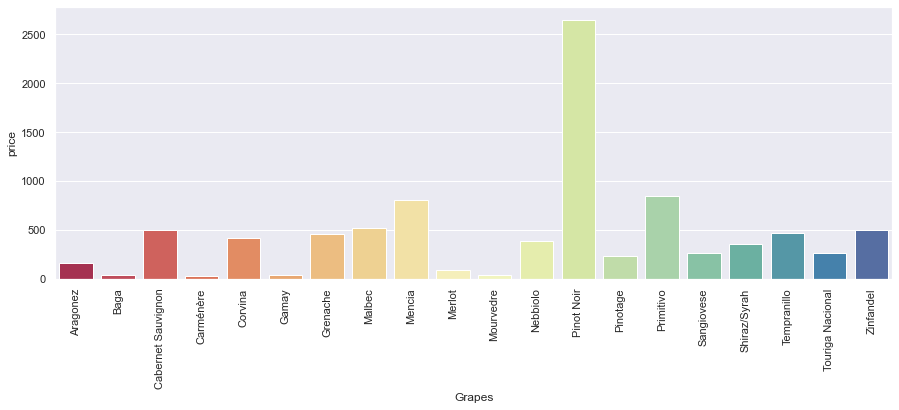

In [57]:
f= sns.barplot(x='Grapes',y='price', data=df4,palette= 'Spectral') 
f.set_xticklabels(
    labels=df4['Grapes'], rotation=90)
f.figure.set_size_inches( 15, 5)
plt.show()

This bar chart illustrates the average price of wines made from different grapes. We can see that wine made from Pinot noir has the highest price, while wine made from Baga, Carménère, and Gamay grapes have lower prices.

# Machine Learning

In this part, I trained several classification algorithms to find the best classification algorithm for the data set I use. I will create an X matrix with "price", "tannin", "wineyard id", "year", "sweetness", "strength", "acidity" and "grape id", all of which are unexpected by wine critics rows, because "wine reviews" is what we will try to predict. Therefore, "wine reviews" will be our goal. The winery id represents different wineries, and the grape id represents different types of grapes. The type of grapes, different wineries, prices and tastes may affect reviews.




According to the vivino wine definition standard, I divide the wine into one of the following quality categories: average, good, very good, rare & extraordinary.

Next we shall create a new column called Review for machine learning. This column will contain the values of 1,2,3 and 4.                              
1 - Average/                                                                                        
2 - Good stuff/                                                                                      
3 - Very good stuff/                                                                                  
4 - Rare & extraordinary.                                                                                
According to the Vivino.com. This will be split in the following way:                                                  
3.0 - 3.5  --> Average                                                                                  
3.5 - 4.0 --> Good stuff                                                                                
4.0 - 4.5  --> Very good stuff                                                                            
4.5 - 5.0  --> Rare & extraordinary                                                                                                                                             
Create an empty list called Reviews

In [9]:
reviews = []
for i in df['rating']:
    if i >= 3.0 and i <= 3.5:
        reviews.append('1')
    elif i >= 3.5 and i <= 4.0:
        reviews.append('2')
    elif i >= 4.0 and i <= 4.5:
        reviews.append('3')
    elif i >= 4.5:
        reviews.append('4')
df['Reviews'] = reviews

In [10]:
df.head()

,name,rating,Rating counts,price,Country,Winery,Winery id,Year,Acidity,Intensity,Sweetness,Tannin,Grapes,Grapes id,Reviews
2,Paraduxx X2 2016,4.5,30,105.00,United States,Paraduxx,536,2016.0,3.972760,4.730052,1.158411,3.610677,Shiraz/Syrah,1,3
4,Paraduxx Proprietary Red 2018,4.3,25,50.00,United States,Paraduxx,536,2018.0,3.785968,4.732352,1.632194,3.327557,Shiraz/Syrah,1,3
7,Paraduxx Postmark Rector Creek Vineyard Red 2016,4.2,37,82.00,United States,Paraduxx,536,2016.0,3.913842,4.858026,1.444211,3.582684,Shiraz/Syrah,1,3
8,Paraduxx Proprietary Red 2017,4.1,470,100.00,United States,Paraduxx,536,2017.0,3.785968,4.732352,1.632194,3.327557,Shiraz/Syrah,1,3
10,Remoriquet Nuits-Saint-Georges 1er Cru 'Les Sa...,4.1,30,74.86,France,Remoriquet,5191,2012.0,4.268214,2.631326,1.222296,2.843929,Pinot Noir,14,3


# Classification with k-nearest neigbor

## Classification with k-nearest neigbor for Rating data

I started with the K-Nearest Neighbors classification algorithm. The function of the algorithm is to obtain a data point and select the K observations closest to the data point in the training data, and then predict the response of the data point based on the most popular response value from the K nearest neighbors.

In [79]:
from sklearn.preprocessing import normalize #get the function needed to normalize our data.
X = df[['price','Winery id','Tannin','Year', 'Sweetness','Intensity','Acidity','Grapes id']] #create the X matrix,I chose "price", "tannin", "winery id  ", "year", "sweetness", "strength", "acidity", and "grape id" that were unexpected by wine reviews to set up X because " "Wine reviews" is what we will try to predict. Therefore, "wine reviews" will be our goal.
X = normalize(X) #normalize the matrix to put everything on the same scale
y = df['Reviews'] #create the y-variable,since rating variables are float, we need to convert them into int to fit k-nn.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) #split the data, store it into different variables

In [27]:
X

array([[5.02707173e-02, 2.56620042e-01, 1.72867926e-03, ...,
        2.26460102e-03, 1.90203347e-03, 4.78768736e-04],
       [2.39396964e-02, 2.56633545e-01, 1.59321399e-03, ...,
        2.26582140e-03, 1.81269873e-03, 4.78793928e-04],
       [3.92783970e-02, 2.56746595e-01, 1.71612312e-03, ...,
        2.32701797e-03, 1.87474936e-03, 4.79004841e-04],
       ...,
       [6.16304800e-02, 5.48469909e-01, 8.30876238e-04, ...,
        1.29025428e-03, 1.48056370e-03, 5.79078335e-03],
       [3.14457136e-01, 5.86740020e-01, 1.35846855e-03, ...,
        1.47641872e-03, 1.41341180e-03, 7.02904186e-03],
       [4.64350535e-03, 9.93765425e-01, 2.07076568e-04, ...,
        2.18107796e-04, 1.99832457e-04, 1.05031669e-03]])

In [28]:
knn = KNeighborsClassifier(n_neighbors=1) #create a KNN-classifier with 1 neighbors.
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data
knn.score(X_test, y_test) #calculate the fit on the test data

0.7024793388429752

###### Accuracy is 70.2%. 

## Precision and recall

Let's look at the confusion matrix to see how well the model tells apart the different ratings. A confusion matrix gives a the different classes and the number of predictions for each combination.

In [29]:
from sklearn.metrics import confusion_matrix
y_test_pred = knn.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
cm

array([[15,  9,  1],
       [ 6, 35,  7],
       [ 1, 12, 35]], dtype=int64)

In order to read this easily , let's make a dataframe out of it, and add labels to it. The order of the labels can be found by using knn.classes_

In [30]:
knn.classes_

array(['2', '3', '4'], dtype=object)

In [31]:
conf_matrix = pd.DataFrame(cm, index=['2','3', '4'], columns = ['Good stuff predicted','Very good stuff predicted', 'Rare & extraordinary predicted']) 
conf_matrix

,Good stuff predicted,Very good stuff predicted,Rare & extraordinary predicted
2,15,9,1
3,6,35,7
4,1,12,35


In [17]:
y_pred = knn.predict(X_test)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,2,3,4,All
Actual,,,,
2,15,9,1,25
3,6,35,7,48
4,1,12,35,48
All,22,56,43,121


Confusion matrices give us insight into the accuracy of our predictions and how they align with actual values.

From our training and test data, we already know that our test data consists of 121 data points.
Actual value is:

Actually rated Good Stuff wine = 25
Actually rated Very Good Stuff wine = 48
Actually rated Rare & Extraordinary wine = 48
The predicted value is:

Wine predicted as Good Stuff = 22
Wine predicted as Very Good Stuff = 56
Predicted Rare & Extraordinary Wine = 43

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.68      0.60      0.64        25
           3       0.62      0.73      0.67        48
           4       0.81      0.73      0.77        48

    accuracy                           0.70       121
   macro avg       0.71      0.69      0.69       121
weighted avg       0.71      0.70      0.70       121



Precision:

Precision is the ratio between the true wines of a certain review and all wines rated for that certain review. For our problem statement, this will be our measure of correctly identifying wine quality from all wines that are truly rated at this level.

---The precision of good stuff is 0.68, the precision of very good stuff is 0.62 and the precision of rare and extraordinary wine is 0.81. Or when it predicts good stuff, it is correct about 68% of the time. When it predicts very good stuff, it is correct about 62% of the time. When it predicts rare and extraordinary wine, it is correct about 81% of the time.

Recall:

The recall rate is a measure of our model's correct identification of true. Therefore, for all the wines actually rated as good staff, the recall tells us how many wines were correctly identified as the wines of good staff. Recall can also measure how accurately our model recognizes relevant data.

---For our model, the recall of good stuff is 0.60, the precision of very good stuff is 0.73 and the precision of rare and extraordinary wine is 0.73. The recall rate is a measure of our model's correct identification of the true value. Therefore, for all the wines that are actually rated as good stuff, recall tells that 60% of wines are correctly identified as the wines of good stuff. For all the wines that are actually rated as very good stuff, recall tells that 73% of wines are correctly identified as the wines of very good stuff. For all the wines that are actually rated as rare & extraordinary wine, recall tells that 73% of wines are correctly identified as the wines of rare & extraordinary. Recall can also measure how accurately our model recognizes relevant data.

## Parameter Settings:

Finally, let me try to set the most important parameter, k, differently. I'm going to do a simple parameter grid search using the for loop. I'll use the built-in classification_report function in sklearn to quickly print out accuracy, accuracy, and recall rates.

In [78]:
from sklearn.metrics import classification_report

for i in range(1,11):
    knn_new = KNeighborsClassifier(n_neighbors = i) #make a new kNN model with i (1-10) neighbors
    knn_new = knn_new.fit(X_train, y_train) #fit new model on train data
    y_test_pred_new = knn_new.predict(X_test) #predict using new model, with test data
    print(f"With {i} neighbors the result is:")
    print(classification_report(y_test, y_test_pred_new)) #use a built-in function to print out accuracy, precision and recall

With 1 neighbors the result is:
              precision    recall  f1-score   support

           2       0.62      0.49      0.55        57
           3       0.66      0.71      0.69       164
           4       0.77      0.77      0.77       142

    accuracy                           0.70       363
   macro avg       0.69      0.66      0.67       363
weighted avg       0.70      0.70      0.70       363

With 2 neighbors the result is:
              precision    recall  f1-score   support

           2       0.50      0.70      0.58        57
           3       0.60      0.64      0.62       164
           4       0.78      0.58      0.67       142

    accuracy                           0.63       363
   macro avg       0.62      0.64      0.62       363
weighted avg       0.65      0.63      0.63       363

With 3 neighbors the result is:
              precision    recall  f1-score   support

           2       0.50      0.32      0.39        57
           3       0.64      0.71

The scores seem to be roughly similar, but 1 neighbor seems to give the best results.

# Random Forest:

Random forest is an ensemble learning method that builds multiple decision trees and then makes predictions based on the predictions of most decision trees.

### Training the algorithm

Split the data set into training set and test set

I chose "price", "tannin", "winery id", "year", "sweetness", "strength", "acidity", and "grape id" that were unexpected by wine reviews to set up X because " "Wine reviews" is what we will try to predict. Therefore, "wine reviews" will be our goal.

In [71]:
X = df[['price','Tannin','Winery id','Year', 'Sweetness','Intensity','Acidity','Grapes id']]  #create the X matrix

y = df['Reviews'] #create the y-variable,since rating variables are float, we need to convert them into int to fit k-nn.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

Let's train the random forest algorithm. RF uses randomness, so if we want the results to be stable for demonstration purposes, we need to set a random_state.

I also set the number of trees (n_estimators) to 100. This will become the default number of trees for the sklearn package in the future.

In [72]:
rf = RandomForestClassifier(random_state=1,n_estimators=50) #RF is a random algorithm, so to get the same results we need to use random_state
rf = rf.fit(X_train, y_train)

In [73]:
print('X train size: ', X_train.shape)
print('y train size: ', y_train.shape)
print('X test size: ', X_test.shape)
print('y test size: ', y_test.shape)

X train size:  (845, 8)
y train size:  (845,)
X test size:  (363, 8)
y test size:  (363,)


In [74]:
rf.score(X_test,y_test)

0.7768595041322314

### Evaluating the model

In [68]:
rf.classes_

array(['2', '3', '4'], dtype=object)

In [75]:
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_pred) #creates a "confusion matrix"
cm = pd.DataFrame(cm, index=['2','3','4'], columns = ['Good stuff predicted','Very good stuff predicted', 'Rare & extraordinary predicted']) #label and make df
cm

,Good stuff predicted,Very good stuff predicted,Rare & extraordinary predicted
2,30,25,2
3,15,126,23
4,0,16,126


In [76]:
y_pred = rf.predict(X_test)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,2,3,4,All
Actual,,,,
2,30,25,2,57
3,15,126,23,164
4,0,16,126,142
All,45,167,151,363


The confusion matrix gives us insight into the accuracy of predictions and how they align with actual values.

From our training and test data, we already know that our test data consists of 363 data points. 

The actual value is:

Wines actually rated as Good Stuff = 57
Wines actually rated as very good = 164 
Wines actually rated as rare and extraordinary = 142 

The predicted value is:

Predicted as good wine = 45 
Predicted as very good wine = 167
Predicted as rare and extraordinary wine = 151

In [77]:
from sklearn.metrics import classification_report #Let's find the recall, precision and accuracy
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.67      0.53      0.59        57
           3       0.75      0.77      0.76       164
           4       0.83      0.89      0.86       142

    accuracy                           0.78       363
   macro avg       0.75      0.73      0.74       363
weighted avg       0.77      0.78      0.77       363



Precision:

---The precision of good stuff is 0.67, the precision of very good stuff is 0.75 and the precision of rare and extraordinary wine is 0.83. Or when it predicts good stuff, it is correct about 67% of the time. When it predicts very good stuff, it is correct about 75% of the time. When it predicts rare and extraordinary wine, it is correct about 83% of the time.

Recall:

---For our model, the recall of good stuff is 0.53, the precision of very good stuff is 0.77 and the precision of rare and extraordinary wine is 0.89.
The recall rate is a measure of our model's correct identification of the true value. Therefore, for all the wines that are actually rated as good stuff, recall tells that 53% of wines are correctly identified as the wines of good stuff. For all the wines that are actually rated as very good stuff, recall tells that 77% of wines are correctly identified as the wines of very good stuff. For all the wines that are actually rated as rare & extraordinary wine, recall tells that 89% of wines are correctly identified as the wines of rare & extraordinary. Recall can also measure how accurately our model recognizes relevant data.

# Conclusion

According to this report, it can be seen that the wine score has little relationship with the taste and price of the wine. According to the data I have obtained, it can be seen that the average score of Spanish wine is the highest, the average score of German wine is the lowest, and the average price of German wine is relatively the lowest. In New Zealand, the average price is relatively low. In addition, the vintage has little effect on wine scores, and the more vintages, the higher the price of wines, especially before 1969. In addition, wines made from Corvina, Tempranillo and Touriga Nacional score higher, while wines made from Gamay grapes have lower prices. Wines made from Pinot Noir have the highest prices, while wines made from Baga, Carmenere and Camry grapes have lower prices.

For the machine learning part, I chose K-Nearest Neighbors and Random Forest. If we compare the cross-validation scores and recall results of all models, we can see that the best result is to use a random forest classifier.

# Reference

Vivino.com. (2021). The Vivino App. Vivino.Com. https://www.vivino.com/app